# 과제#3. [평가] 이동통신 고객 이탈 예측

* 여러분은 OO 통신화사 데이터분석가 입니다.
* 00 통신회사의 올해 고객 목표는, **현재 고객수를 유지**하는 것입니다.
* 더욱 치열해진 경쟁 상황에서 고객수를 유지하는 것은 굉장히 도전적인 목표 입니다.
* 이를 위해 회사는 약정기간이 끝난 고객이 번호이동(이탈)해 가는 문제를 해결하고자 합니다.
* 그래서 에이블러 여러분에게, 어떤 고객이 번호이동(이탈)해 가는지 예측 모델링을 의뢰하였습니다.

![](https://d18lkz4dllo6v2.cloudfront.net/cumulus_uploads/entry/23964/mobile%20phones.png)

## 0.환경설정

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

### 2) 데이터 로딩

In [2]:
# mobile data
data_path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_NA2.csv"
data = pd.read_csv(data_path)
data.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,544,1,47711,183,17,730589.0,192,19,5,unsat,little,considering,0
1,689,0,74132,191,43,535092.0,349,15,2,unsat,very_little,no,1
2,3134,1,150419,0,14,204004.0,682,0,6,unsat,very_high,considering,0
3,12523,0,159567,0,58,281969.0,634,1,1,very_unsat,very_high,never_thought,0
4,2374,1,23392,0,0,216707.0,233,0,15,unsat,very_little,no,1


|변수 명|내용|구분|
|	----	|	----	|	----	|
|	COLLEGE	|	대학졸업 여부(1,0) - 범주	|		|
|	INCOME	|	연 수입액(달러)	|		|
|	OVERAGE	|	월 초과사용 시간(분)	|		|
|	LEFTOVER	|	월 사용 잔여시간비율(%)	|		|
|	HOUSE	|	집 가격(달러)	|		|
|	HANDSET_PRICE	|	핸드폰 가격(달러)	|		|
|	OVER_15MINS_CALLS_PER_MONTH	|	 평균 장기통화(15분 이상) 횟수	|		|
|	AVERAGE_CALL_DURATION	|	평균 통화시간(분)	|		|
|	REPORTED_SATISFACTION	|	만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' ) - 범주	|		|
|	REPORTED_USAGE_LEVEL	|	사용 수준 설문('very_little', 'little', 'avg', 'high', 'very_high') - 범주	|		|
|	CONSIDERING_CHANGE_OF_PLAN	|	변경 계획 설문('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it') - 범주	|		|
|	**CHURN**	|	이탈여부(1 : 이탈, 0 : 잔류)	|	**Target**	|


----

## 1.데이터 탐색

## 2.데이터 전처리 

In [3]:
target = 'CHURN'

### 2.1 데이터 정리

* feature와 , target으로 분할

In [4]:
x = data.drop(target, axis = 1)
y = data.loc[:, target]

* 불필요한 feature 제거
    * 제거해야 할 feature를 선정하고 제거하시오. 제거 이유를 주석으로 기술합니다.

In [5]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           18000 non-null  int64  
 1   COLLEGE                      18000 non-null  int64  
 2   INCOME                       18000 non-null  int64  
 3   OVERAGE                      18000 non-null  int64  
 4   LEFTOVER                     18000 non-null  int64  
 5   HOUSE                        17785 non-null  float64
 6   HANDSET_PRICE                18000 non-null  int64  
 7   OVER_15MINS_CALLS_PER_MONTH  18000 non-null  int64  
 8   AVERAGE_CALL_DURATION        18000 non-null  int64  
 9   REPORTED_SATISFACTION        17962 non-null  object 
 10  REPORTED_USAGE_LEVEL         18000 non-null  object 
 11  CONSIDERING_CHANGE_OF_PLAN   18000 non-null  object 
dtypes: float64(1), int64(8), object(3)
memory usage: 1.6+ MB


In [6]:
len(x['id'].unique())

18000

In [7]:
# 딥러닝을 통해 새로운 feature를 만들 수 있기 때문에 모든 데이터를 지우지 않고 진행해 보겠습니다.
# id 값은 모두 고유 값으로 제거하겠습니다.

drop_col = ['id']
x.drop(drop_col, axis=1, inplace=True)
x.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN
0,1,47711,183,17,730589.0,192,19,5,unsat,little,considering
1,0,74132,191,43,535092.0,349,15,2,unsat,very_little,no
2,1,150419,0,14,204004.0,682,0,6,unsat,very_high,considering
3,0,159567,0,58,281969.0,634,1,1,very_unsat,very_high,never_thought
4,1,23392,0,0,216707.0,233,0,15,unsat,very_little,no


### 2.2 NaN에 대한 조치
* 데이터에 포함된 NaN에 대해서 조치 방법을 결정하고 적용합니다.
* **조치방법을 결정한 이유**를 주석으로 기술합니다.

In [8]:
x.isna().sum()

COLLEGE                          0
INCOME                           0
OVERAGE                          0
LEFTOVER                         0
HOUSE                          215
HANDSET_PRICE                    0
OVER_15MINS_CALLS_PER_MONTH      0
AVERAGE_CALL_DURATION            0
REPORTED_SATISFACTION           38
REPORTED_USAGE_LEVEL             0
CONSIDERING_CHANGE_OF_PLAN       0
dtype: int64

In [9]:
# KNNImpute를 사용하기 위해 가변수화를 진행하고 진행하겠습니다.
# KNNImpute를 사용하는 이유는 NaN 값이 있는 feature를 target으로 그 외의 값으로 예측을 하기 때문에 가장 정확할 것이라고 생각했습니다.

### 2.3 (옵션) 추가변수 도출
* 기존 데이터셋의 변수를 이용하여 추가로 도출할 수 있는 변수가 있다면 수행합니다.
* 추가변수 생성시, 이유에 대해서 **주석**으로 기술합니다.

### 2.4 가변수화
* 범주형 데이터이면서 값이 0,1 로 되어 있는 것이 아니라면, 가변수화를 수행해야 합니다.
* 대상이 되는 변수에 대해서 가변수화를 수행해주세요.

In [10]:
dump_col = ['REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN']
x = pd.get_dummies(x, columns=dump_col)
x.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION_avg,REPORTED_SATISFACTION_sat,...,REPORTED_USAGE_LEVEL_avg,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,1,47711,183,17,730589.0,192,19,5,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,74132,191,43,535092.0,349,15,2,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,150419,0,14,204004.0,682,0,6,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,159567,0,58,281969.0,634,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,23392,0,0,216707.0,233,0,15,0,0,...,0,0,0,0,1,0,0,0,1,0


In [11]:
# KNNImpute로 NaN 값을 처리하겠습니다.
from sklearn.impute import KNNImputer

impute = KNNImputer(n_neighbors=5)
imputed = impute.fit_transform(x)
x = pd.DataFrame(imputed, columns=x.columns)
x.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION_avg,REPORTED_SATISFACTION_sat,...,REPORTED_USAGE_LEVEL_avg,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,1.0,47711.0,183.0,17.0,730589.0,192.0,19.0,5.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,74132.0,191.0,43.0,535092.0,349.0,15.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,150419.0,0.0,14.0,204004.0,682.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,159567.0,0.0,58.0,281969.0,634.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,23392.0,0.0,0.0,216707.0,233.0,0.0,15.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [12]:
x.isna().sum()

COLLEGE                                                0
INCOME                                                 0
OVERAGE                                                0
LEFTOVER                                               0
HOUSE                                                  0
HANDSET_PRICE                                          0
OVER_15MINS_CALLS_PER_MONTH                            0
AVERAGE_CALL_DURATION                                  0
REPORTED_SATISFACTION_avg                              0
REPORTED_SATISFACTION_sat                              0
REPORTED_SATISFACTION_unsat                            0
REPORTED_SATISFACTION_very_sat                         0
REPORTED_SATISFACTION_very_unsat                       0
REPORTED_USAGE_LEVEL_avg                               0
REPORTED_USAGE_LEVEL_high                              0
REPORTED_USAGE_LEVEL_little                            0
REPORTED_USAGE_LEVEL_very_high                         0
REPORTED_USAGE_LEVEL_very_littl

### 2.5 데이터 분할

* test 3000건(test_size = 3000), random_state = 2022
* val 3000건(test_size = 3000), random_state = 2022
* train 나머지.

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=300, random_state=2022)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=300, random_state=2022)

In [14]:
# train은 훈련용으로 사용, vla은 성능 확인용으로 사용, test는 선택된 모델의 최종 성능을 확인하기 위해 사용합니다.
(x_train.shape, y_train.shape), (x_val.shape, y_val.shape), (x_test.shape, y_test.shape)

(((17400, 23), (17400,)), ((300, 23), (300,)), ((300, 23), (300,)))

### 2.6 (옵션)스케일링 
* 스케일링을 필요로 하는 알고리즘이 있습니다. 
* 필요하다고 판단될때 수행합니다.

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_col = list(x_train)

# MinMaxScaler 적용
x_tr_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)
x_te_s = scaler.transform(x_test)

# DataFrame으로 변환
x_tr_s = pd.DataFrame(x_tr_s, columns=x_col)
x_val_s = pd.DataFrame(x_val_s, columns=x_col)
x_te_s = pd.DataFrame(x_te_s, columns=x_col)

In [16]:
x_tr_s.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION_avg,REPORTED_SATISFACTION_sat,...,REPORTED_USAGE_LEVEL_avg,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,1.0,0.322970,0.545994,0.000000,0.296293,0.299090,0.62069,0.642857,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.632301,0.005935,0.370787,0.508308,0.994798,0.00000,0.071429,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.934696,0.005935,0.089888,0.691086,0.726918,0.00000,0.357143,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.135195,0.243323,0.134831,0.236965,0.071521,0.00000,0.214286,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.055910,0.005935,0.617978,0.958211,0.258778,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


## 3.모델링1 : 머신러닝

### 3.1 모델링을 위한 함수 불러오기

* **꼭 필요한 라이브러리 혹은 함수**만 불러옵니다. 무조건 다 불러오는 것은 지양해주세요.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

### 3.2 모델링
* 최소 3개 이상의 알고리즘을 선정합니다.(알고리즘에는 최소 1개 이상의 앙상블 기법을 포함)
    * 아래 주어진 목록 이외의 알고리즘을 선정해도 좋습니다.
* 각 알고리즘별 튜닝을 수행하여 최적의 모델을 생성합니다.
    * 튜닝 방식은 GridSearchCV, RandomizedSearchCV 혹은 for loop 로 직접
    * 단, 선형회귀, 로지스틱 회귀의는 입력 변수(feature)를 조절하여 튜닝을 합니다.
    * 튜닝 과정에 대해서 주석으로 기술합니다.
* 모델링, 튜닝만 수행하는데 그치지 말고, 모델의 내용을 파악하기 위한 분석을 시도합니다. 코드 결과에 대한 분석 의견을 주석으로 기술합니다.
    * 예 : 모델 시각화 및 내용 파악, 튜닝 결과 분석 및 시각화

#### (1) Logistic Regression

In [18]:
model_lg = LogisticRegression()

In [19]:
model_lg.fit(x_train, y_train)

LogisticRegression()

In [20]:
for i in range(len(list(x_train))) :
    print(list(x_train)[i], ':', model_lg.coef_[0][i])
    
print(model_lg.intercept_)

COLLEGE : 5.190975667733416e-06
INCOME : 3.033236513431479e-06
OVERAGE : 0.006020759879120005
LEFTOVER : 0.0007172669325042996
HOUSE : -1.931866494675824e-06
HANDSET_PRICE : 0.000375254477983482
OVER_15MINS_CALLS_PER_MONTH : 0.0005661773743911068
AVERAGE_CALL_DURATION : 2.1466350307321254e-05
REPORTED_SATISFACTION_avg : -7.12799491277832e-07
REPORTED_SATISFACTION_sat : -8.583276699309056e-07
REPORTED_SATISFACTION_unsat : 1.943783105361344e-06
REPORTED_SATISFACTION_very_sat : 1.1987481426868025e-06
REPORTED_SATISFACTION_very_unsat : 4.008208360448632e-06
REPORTED_USAGE_LEVEL_avg : 1.7926460196163142e-07
REPORTED_USAGE_LEVEL_high : -4.4475098928940985e-08
REPORTED_USAGE_LEVEL_little : 1.628225774103652e-06
REPORTED_USAGE_LEVEL_very_high : 2.1085071728847894e-06
REPORTED_USAGE_LEVEL_very_little : 1.7600051086849174e-06
CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it : 3.9896212536748196e-07
CONSIDERING_CHANGE_OF_PLAN_considering : 1.1015016468756635e-06
CONSIDERING_CHANGE_OF_PLAN_neve

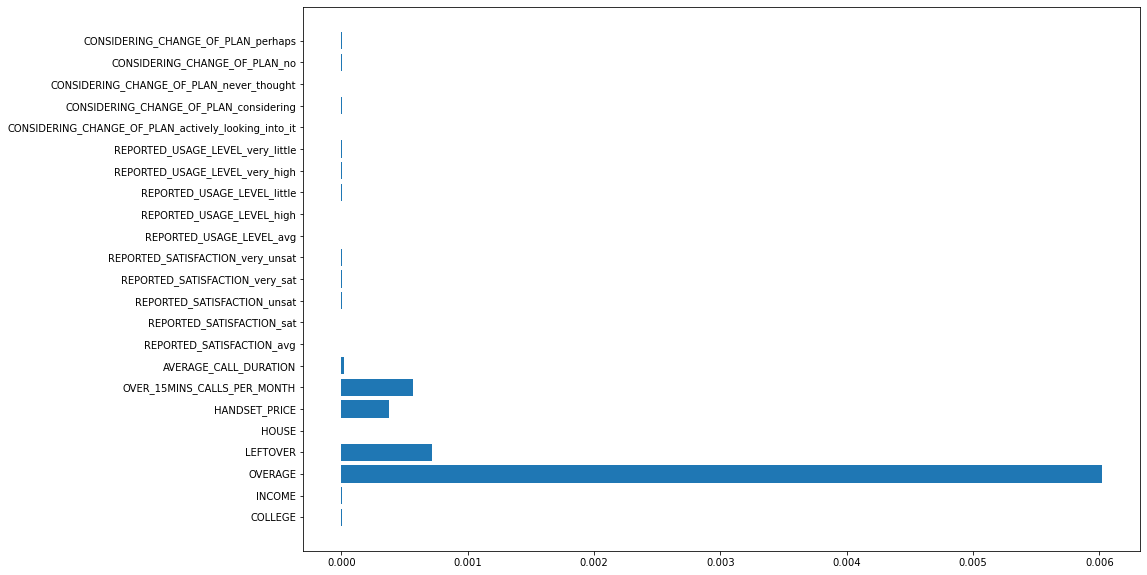

In [21]:
# LogisticRegression의 변수 가중치는 이번 모델에 변수가 미치는 중요도라고 파악하여 시각화 진행
plt.figure(figsize=(15, 10))
plt.barh(width=model_lg.coef_[0], y=list(x_train))
plt.show()

In [22]:
# 예측
lg_y_val_pred = model_lg.predict(x_val)
print(classification_report(y_val, lg_y_val_pred))

              precision    recall  f1-score   support

           0       0.60      0.65      0.63       152
           1       0.61      0.56      0.58       148

    accuracy                           0.61       300
   macro avg       0.61      0.61      0.61       300
weighted avg       0.61      0.61      0.61       300



#### (2) KNN

- knn은 거리로 예측을 하는 알고리즘으로 scaler를 적용한 feature로 진행

In [23]:
model_knn = KNeighborsClassifier()

param = {'n_neighbors' : range(2, 11)}

model_knn_grid = GridSearchCV(model_knn,
                              param,
                              cv=10,
                              scoring='accuracy')

In [24]:
model_knn_grid.fit(x_tr_s, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 11)}, scoring='accuracy')

In [25]:
# 최적의 파라미터를 갖는 모델 확인
model_knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=7)

In [26]:
# 예측
knn_y_val_pred = model_knn_grid.predict(x_val_s)
print(classification_report(y_val, knn_y_val_pred))

              precision    recall  f1-score   support

           0       0.62      0.68      0.65       152
           1       0.63      0.57      0.60       148

    accuracy                           0.63       300
   macro avg       0.63      0.63      0.63       300
weighted avg       0.63      0.63      0.63       300



#### (3) Decision Tree

In [27]:
model_dt = DecisionTreeClassifier(random_state=2022)

param = {'max_depth' : range(2, 50)}

model_dt_random = RandomizedSearchCV(model_dt,
                                     param,
                                     cv=10,
                                     n_iter=20,
                                     scoring='accuracy')

model_dt_random.fit(x_train, y_train)
print(model_dt_random.best_estimator_)

DecisionTreeClassifier(max_depth=5, random_state=2022)


In [28]:
# RandomizedSearchCV 결과를 DataFrame으로 변환
result_random = pd.DataFrame(model_dt_random.cv_results_)
result_random = result_random[['param_max_depth', 'mean_test_score']]
result_random.sort_values(by='param_max_depth', inplace=True)
result_random.reset_index(drop=True, inplace=True)

In [29]:
# GridSearchCV 할 범위 지정
idx = result_random[result_random['param_max_depth']==model_dt_random.best_params_['max_depth']].index[0]

start = 1
end = 51
if idx != 0 :
    start = result_random.loc[idx-1]['param_max_depth']
if idx != 10 :
    end = result_random.loc[idx+1]['param_max_depth']

In [30]:
# GridSEarchCV 진행
param = {'max_depth' : range(start, end)}

model_dt_grid = GridSearchCV(model_dt,
                         param,
                         cv=10,
                         scoring='accuracy')

model_dt_grid.fit(x_train, y_train)

print(model_dt_grid.best_estimator_)

DecisionTreeClassifier(max_depth=4, random_state=2022)


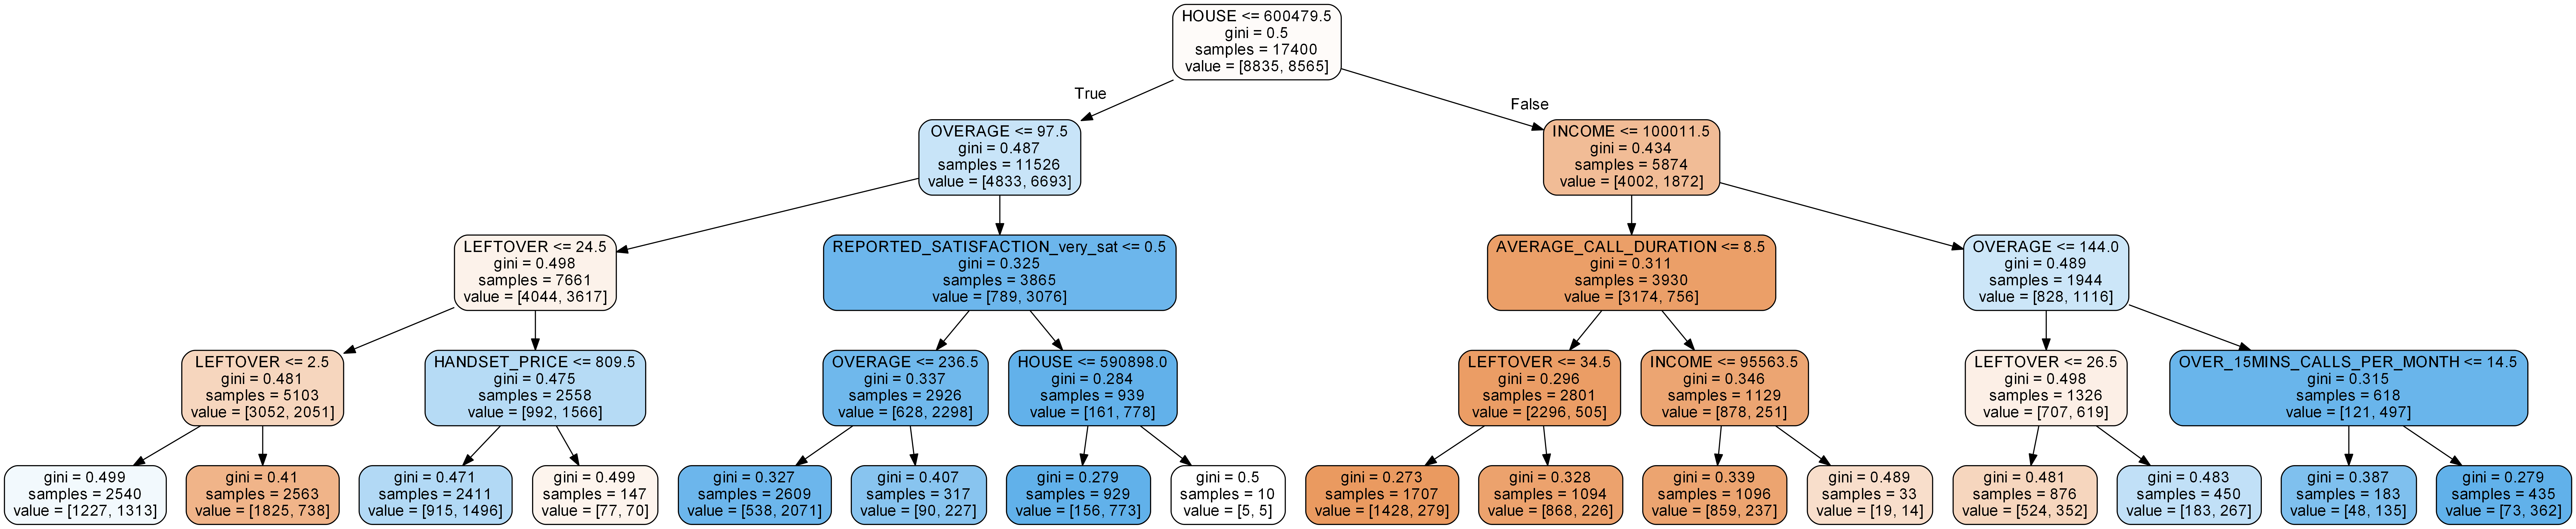

In [31]:
# 시각화
from sklearn.tree import export_graphviz

export_graphviz(model_dt_grid.best_estimator_,
                out_file = 'tree.dot',
                feature_names = x_train.columns,
                rounded = True, precision = 3, filled = True)
!dot -Tpng tree.dot -o tree.png -Gdpi=300

#이미지 파일 로딩하기.
from IPython.display import Image
Image(filename = 'tree.png', width = 800)  # 사이즈 조정.

# 7일 전의 이용량과 2일전의 이용량 변수가 자주 사용되었음을 확인가능

In [32]:
# 예측
dt_y_val_pred = model_dt_grid.predict(x_val)
print(classification_report(y_val, dt_y_val_pred))

              precision    recall  f1-score   support

           0       0.77      0.65      0.70       152
           1       0.69      0.80      0.74       148

    accuracy                           0.72       300
   macro avg       0.73      0.72      0.72       300
weighted avg       0.73      0.72      0.72       300



#### (4) SVM
- svm은 거리로 예측을 하는 알고리즘으로 scaler를 적용한 feature로 진행

In [33]:
# GridSearchCV로 끝날 기미가 보이지 않아 우선 parameter 없이 진행했습니다.

model_svm = SVC()

model_svm.fit(x_tr_s, y_train)

SVC()

In [34]:
# 예측
svm_y_val_pred = model_svm.predict(x_val_s)
print(classification_report(y_val, svm_y_val_pred))

              precision    recall  f1-score   support

           0       0.64      0.72      0.68       152
           1       0.67      0.59      0.63       148

    accuracy                           0.66       300
   macro avg       0.66      0.66      0.65       300
weighted avg       0.66      0.66      0.65       300



#### (5) Random Forest

In [35]:
# GridSearchCV로 끝날 기미가 보이지 않아 우선 parameter 없이 진행했습니다.

model_rf = RandomForestClassifier(random_state=2022)

model_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=2022)

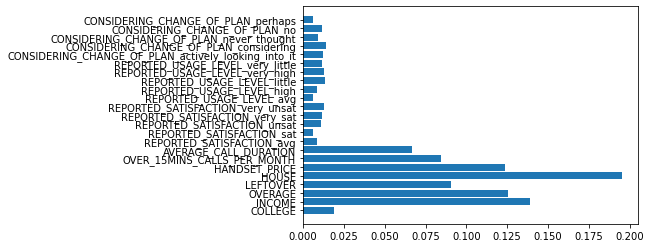

In [36]:
plt.barh(y=list(x_train), width=model_rf.feature_importances_)
plt.show()

In [37]:
# 예측
rf_y_val_pred = model_rf.predict(x_val)
print(classification_report(y_val, rf_y_val_pred))

              precision    recall  f1-score   support

           0       0.72      0.66      0.69       152
           1       0.68      0.74      0.71       148

    accuracy                           0.70       300
   macro avg       0.70      0.70      0.70       300
weighted avg       0.70      0.70      0.70       300



#### (6) XGBoost

In [38]:
# GridSearchCV로 끝날 기미가 보이지 않아 우선 parameter 없이 진행했습니다.

model_xgb = XGBClassifier()

model_xgb.fit(x_train, y_train)

[14:45:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

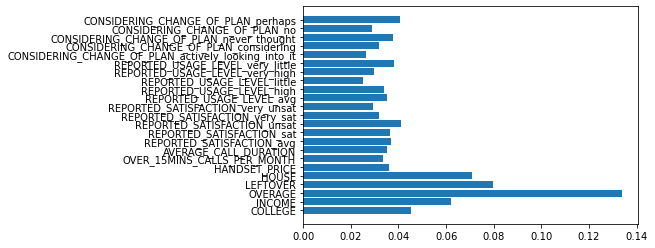

In [39]:
plt.barh(y=list(x_train), width=model_xgb.feature_importances_)
plt.show()

In [40]:
xgb_y_val_pred = model_xgb.predict(x_val)
print(classification_report(y_val, xgb_y_val_pred))

              precision    recall  f1-score   support

           0       0.72      0.66      0.69       152
           1       0.68      0.74      0.71       148

    accuracy                           0.70       300
   macro avg       0.70      0.70      0.70       300
weighted avg       0.70      0.70      0.70       300



## 4.모델링2 : DL

### 4.1 모델링을 위한 함수 불러오기

In [41]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Add, Concatenate
from tensorflow.keras.models import Model

from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.backend import clear_session
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam

### 4.2 모델링

* 딥러닝 모델을 3개 이상 생성하시오
    * 다양한 구조의 모델 3개 이상을 설계하시오. (히든레이어, 노드 수 조절)
    * 각 모델은 구조가 달라야 합니다.
    * 구조를 그렇게 구성한 이유를 주석으로 기술해 봅시다.
* 각 모델마다 
    * 구조를 summary 혹은 plot model로 확인
    * 학습 후 history plot 그리고 적절하게 학습이 되었는지 확인    

#### (1) 모델1

In [42]:
x_train.shape, y_train.shape

((17400, 23), (17400,))

In [43]:
# 가장 기본적인 input과 output만 있는 모델을 생성해봤습니다.

# 초기화
clear_session()

# 레이어 생성
input_layer = Input(shape=(23,))
output_layer = Dense(1, activation='sigmoid')(input_layer)

# 모델 생성
model_dl1 = Model(input_layer, output_layer)

# 컴파일
model_dl1.compile(loss=binary_crossentropy, metrics=['accuracy'], optimizer=Adam())

# summary
model_dl1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 23)]              0         
                                                                 
 dense (Dense)               (None, 1)                 24        
                                                                 
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


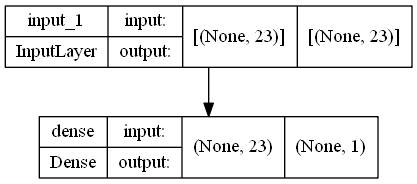

In [44]:
plot_model(model_dl1, show_shapes=True)

In [45]:
# 모델 훈련
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, restore_best_weights=True)

history1 = model_dl1.fit(x_train, y_train, epochs=100, verbose=1, callbacks=[es], validation_split=0.15)

Epoch 1/100
463/463 [==============================] - 2s 2ms/step - loss: 6392.8628 - accuracy: 0.4538 - val_loss: 29.8907 - val_accuracy: 0.4962
Epoch 2/100
463/463 [==============================] - 1s 2ms/step - loss: 24.8883 - accuracy: 0.5228 - val_loss: 9.2608 - val_accuracy: 0.4893
Epoch 3/100
463/463 [==============================] - 1s 2ms/step - loss: 22.8368 - accuracy: 0.5425 - val_loss: 20.1366 - val_accuracy: 0.5640
Epoch 4/100
463/463 [==============================] - 1s 2ms/step - loss: 26.3266 - accuracy: 0.5542 - val_loss: 6.5412 - val_accuracy: 0.6065
Epoch 5/100
463/463 [==============================] - 1s 2ms/step - loss: 18.1852 - accuracy: 0.5617 - val_loss: 18.8488 - val_accuracy: 0.5080
Epoch 6/100
463/463 [==============================] - 1s 2ms/step - loss: 28.7869 - accuracy: 0.5498 - val_loss: 13.0621 - val_accuracy: 0.5854
Epoch 7/100
463/463 [==============================] - 1s 2ms/step - loss: 20.7488 - accuracy: 0.5582 - val_loss: 5.9513 - val_acc

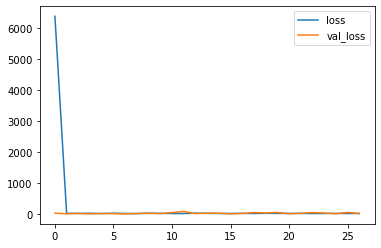

In [46]:
# 모델 history plot
plt.plot(history1.history['loss'], label='loss')
plt.plot(history1.history['val_loss'], label='val_loss')

plt.legend()

plt.show()

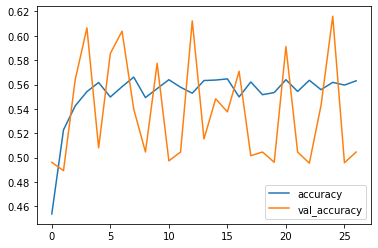

In [47]:
# 모델 history plot
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label='val_accuracy')

plt.legend()

plt.show()

In [48]:
# 예측
dl1_y_val_pred = model_dl1.predict(x_val)
dl1_y_val_pred = np.where(dl1_y_val_pred>0.5, 1, 0)
print(classification_report(y_val, dl1_y_val_pred))

              precision    recall  f1-score   support

           0       0.59      0.79      0.68       152
           1       0.67      0.45      0.54       148

    accuracy                           0.62       300
   macro avg       0.63      0.62      0.61       300
weighted avg       0.63      0.62      0.61       300



#### (2) 모델2

In [49]:
# hidden layer를 2개를 더 추가하여 새로운 feature를 생성하여 훈련을 시켜보겠습니다.

# 초기화
clear_session()

# 레이어 생성
input_layer = Input(shape=(23,))
hiden_layer = Dense(32, activation='relu')(input_layer)
hiden_layer = Dense(16, activation='relu')(hiden_layer)
output_layer = Dense(1, activation='sigmoid')(hiden_layer)

# 모델 생성
model_dl2 = Model(input_layer, output_layer)

# 컴파일
model_dl2.compile(loss=binary_crossentropy, metrics=['accuracy'], optimizer=Adam())

# summary
model_dl2.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 23)]              0         
                                                                 
 dense (Dense)               (None, 32)                768       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,313
Trainable params: 1,313
Non-trainable params: 0
_________________________________________________________________


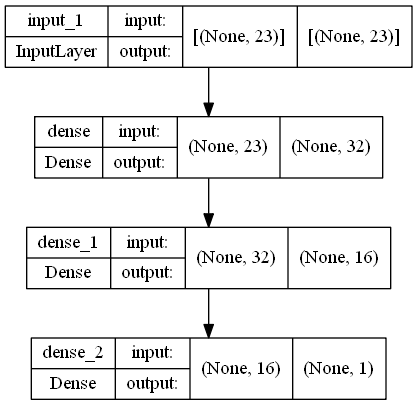

In [50]:
plot_model(model_dl2, show_shapes=True)

In [51]:
# 모델 훈련
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, restore_best_weights=True)

history2 = model_dl2.fit(x_train, y_train, epochs=100, verbose=1, callbacks=[es], validation_split=0.15)

Epoch 1/100
463/463 [==============================] - 2s 3ms/step - loss: 1107.1632 - accuracy: 0.5283 - val_loss: 589.1242 - val_accuracy: 0.5038
Epoch 2/100
463/463 [==============================] - 1s 2ms/step - loss: 176.0654 - accuracy: 0.5458 - val_loss: 197.8604 - val_accuracy: 0.5004
Epoch 3/100
463/463 [==============================] - 1s 2ms/step - loss: 182.2991 - accuracy: 0.5441 - val_loss: 253.5920 - val_accuracy: 0.4992
Epoch 4/100
463/463 [==============================] - 1s 2ms/step - loss: 152.9019 - accuracy: 0.5586 - val_loss: 275.4105 - val_accuracy: 0.5161
Epoch 5/100
463/463 [==============================] - 1s 2ms/step - loss: 172.6770 - accuracy: 0.5592 - val_loss: 289.0683 - val_accuracy: 0.5042
Epoch 6/100
463/463 [==============================] - 1s 2ms/step - loss: 155.6943 - accuracy: 0.5605 - val_loss: 48.8688 - val_accuracy: 0.5920
Epoch 7/100
463/463 [==============================] - 1s 2ms/step - loss: 122.8551 - accuracy: 0.5629 - val_loss: 294

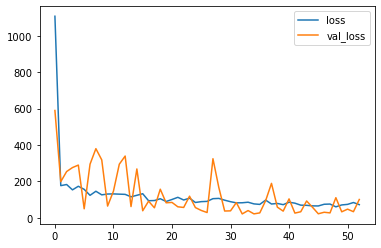

In [52]:
# 모델 history plot
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label='val_loss')

plt.legend()

plt.show()

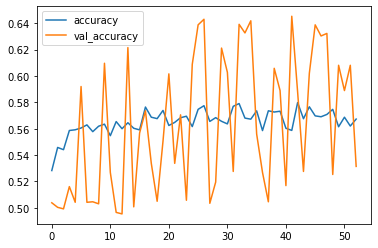

In [53]:
# 모델 history plot
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label='val_accuracy')

plt.legend()

plt.show()

In [54]:
# 예측
dl2_y_val_pred = model_dl2.predict(x_val)
dl2_y_val_pred = np.where(dl2_y_val_pred>0.5, 1, 0)
print(classification_report(y_val, dl2_y_val_pred))

              precision    recall  f1-score   support

           0       0.62      0.66      0.64       152
           1       0.63      0.59      0.61       148

    accuracy                           0.63       300
   macro avg       0.63      0.63      0.63       300
weighted avg       0.63      0.63      0.63       300



#### (3) 모델3

In [55]:
dic = {'satisfaction' : ['REPORTED_SATISFACTION_avg', 'REPORTED_SATISFACTION_sat', 'REPORTED_SATISFACTION_unsat', 'REPORTED_SATISFACTION_very_sat', 'REPORTED_SATISFACTION_very_unsat'],
       'usage' : ['REPORTED_USAGE_LEVEL_avg', 'REPORTED_USAGE_LEVEL_high', 'REPORTED_USAGE_LEVEL_little','REPORTED_USAGE_LEVEL_very_high' ,'REPORTED_USAGE_LEVEL_very_little'],
       'considering' : ['CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it' ,'CONSIDERING_CHANGE_OF_PLAN_considering', 'CONSIDERING_CHANGE_OF_PLAN_never_thought', 'CONSIDERING_CHANGE_OF_PLAN_no' ,'CONSIDERING_CHANGE_OF_PLAN_perhaps']}
for_num = np.array(list(dic.values())).reshape(-1)

satisfaction_x_tr = x_train[dic['satisfaction']]
usage_x_tr = x_train[dic['usage']]
considering_x_tr = x_train[dic['considering']]
num_x_tr = x_train.drop(for_num, axis=1)

satisfaction_x_val = x_val[dic['satisfaction']]
usage_x_val = x_val[dic['usage']]
considering_x_val = x_val[dic['considering']]
num_x_val = x_val.drop(for_num, axis=1)

In [56]:
satisfaction_x_tr.shape, usage_x_tr.shape, considering_x_tr.shape, num_x_tr.shape

((17400, 5), (17400, 5), (17400, 5), (17400, 8))

In [57]:
# 설문 조사 별로 나눠서 3개의 input을 생성하고 add 후 나머지를 input하여 concat하는 모델을 생성

# 초기화
clear_session()

# 레이어 생성
satisfaction_input_layer = Input(shape=(5, ))
satisfaction_hiden_layer = Dense(5)(satisfaction_input_layer)

usage_input_layer = Input(shape=(5, ))
usage_hiden_layer = Dense(5)(usage_input_layer)

considering_input_layer = Input(shape=(5, ))
considering_hiden_layer = Dense(5)(considering_input_layer)

add_layer = Add()([satisfaction_hiden_layer, usage_hiden_layer, considering_hiden_layer])

num_input_layer = Input(shape=(8, ))

concat_layer = Concatenate()([add_layer, num_input_layer])
hiden_layer = Dense(8)(concat_layer)
output_layer = Dense(1, activation='sigmoid')(hiden_layer)

# 모델 생성
model_dl3 = Model([satisfaction_input_layer, usage_input_layer, considering_input_layer, num_input_layer], output_layer)

# 컴파일
model_dl3.compile(loss=binary_crossentropy, metrics=['accuracy'], optimizer=Adam())

# summary
model_dl3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 5)            30          ['input_1[0][0]']                
                                                                                              

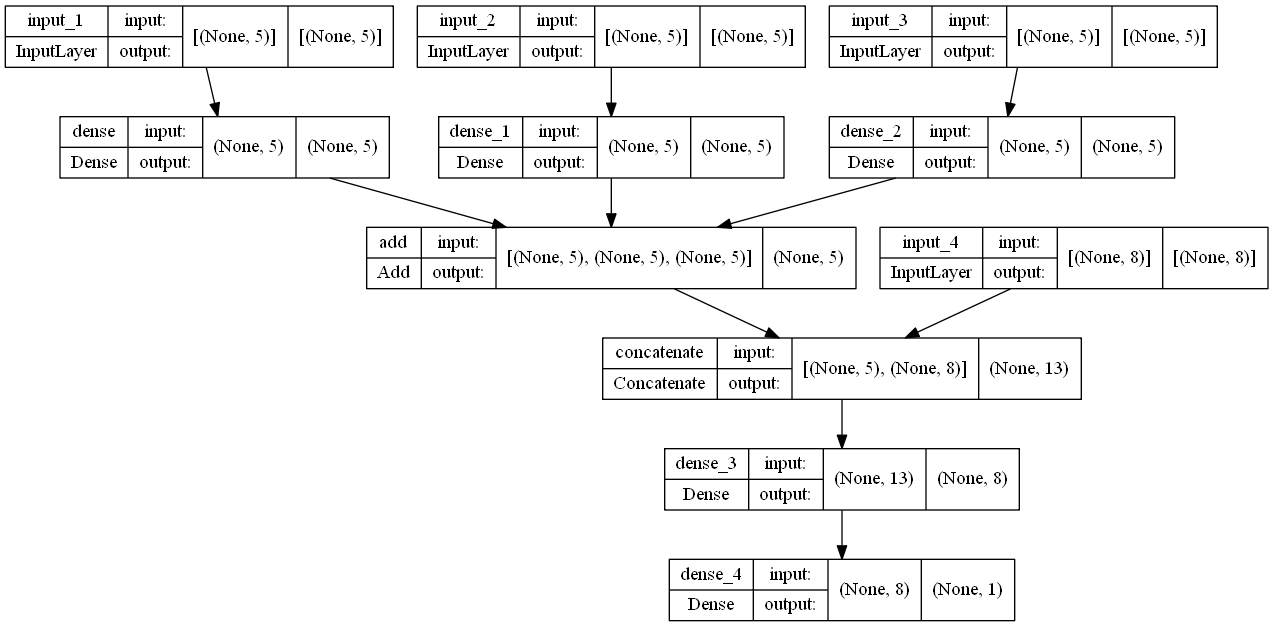

In [58]:
plot_model(model_dl3, show_shapes=True)

In [59]:
# 모델 훈련
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, restore_best_weights=True)

history3 = model_dl3.fit([satisfaction_x_tr, usage_x_tr, considering_x_tr, num_x_tr], y_train,
                         epochs=100, verbose=1, callbacks=[es], validation_split=0.15)

Epoch 1/100
463/463 [==============================] - 3s 4ms/step - loss: 8745.2354 - accuracy: 0.5660 - val_loss: 146.0206 - val_accuracy: 0.5149
Epoch 2/100
463/463 [==============================] - 2s 3ms/step - loss: 112.0275 - accuracy: 0.5388 - val_loss: 422.6125 - val_accuracy: 0.5046
Epoch 3/100
463/463 [==============================] - 1s 3ms/step - loss: 94.4850 - accuracy: 0.5486 - val_loss: 283.4426 - val_accuracy: 0.5046
Epoch 4/100
463/463 [==============================] - 1s 3ms/step - loss: 106.6324 - accuracy: 0.5485 - val_loss: 218.4992 - val_accuracy: 0.5046
Epoch 5/100
463/463 [==============================] - 1s 2ms/step - loss: 81.8805 - accuracy: 0.5665 - val_loss: 45.4216 - val_accuracy: 0.5931
Epoch 6/100
463/463 [==============================] - 1s 2ms/step - loss: 91.5371 - accuracy: 0.5554 - val_loss: 250.2106 - val_accuracy: 0.5046
Epoch 7/100
463/463 [==============================] - 1s 2ms/step - loss: 94.7634 - accuracy: 0.5463 - val_loss: 43.5236

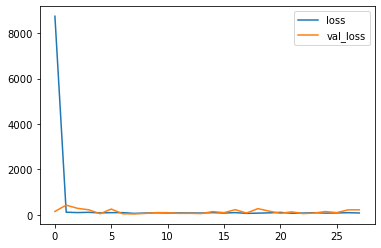

In [60]:
# 모델 history plot
plt.plot(history3.history['loss'], label='loss')
plt.plot(history3.history['val_loss'], label='val_loss')

plt.legend()

plt.show()

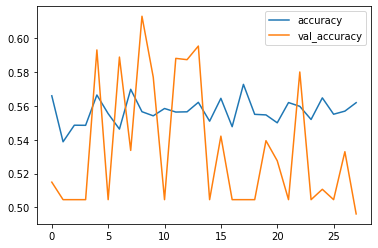

In [61]:
# 모델 history plot
plt.plot(history3.history['accuracy'], label='accuracy')
plt.plot(history3.history['val_accuracy'], label='val_accuracy')

plt.legend()

plt.show()

In [62]:
# 예측
dl3_y_val_pred = model_dl3.predict([satisfaction_x_val, usage_x_val, considering_x_val, num_x_val])
dl3_y_val_pred = np.where(dl3_y_val_pred>0.5, 1, 0)
print(classification_report(y_val, dl3_y_val_pred))

              precision    recall  f1-score   support

           0       0.68      0.10      0.17       152
           1       0.51      0.95      0.66       148

    accuracy                           0.52       300
   macro avg       0.59      0.53      0.42       300
weighted avg       0.60      0.52      0.41       300



#### (4) 추가

## 5.성능 비교
* 총 모델이 최소한 ML 3가지, DL 3가지 입니다. 이에 대해 성능을 평가합니다.
* 평가를 위한 적절한 지표(metric)을 결정하고 비교합니다.
    * **평가지표 선정 이유**를 주석으로 기술하시오.
* 최종 모델을 **선정하게 된 근거**를 주석으로 기술하시오.

### 5.1 평가지표 결정

* 어떤 지표로 성능을 비교할지 결정합니다.
* 결정 이유를 기술합니다.

In [63]:
# 이탈한 고객의 f1_score와 이탈한 고객의 precision이 높은 것이 좋은 모델이라고 생각합니다.
# 이유는 이탈 고객을 방지하는 것이 중요하다고 했으니 이탈 고객을 예측을 잘하는 것이 중요하다고 생각하기에 이탈 고객의
# f1_score가 중요하고 precision이 높은 것은 예측한 것 중 맞춘 비율이기 때문에 예측을 잘했다는 것입니다.
# 이미 이탈한 고객들은 어떻게 하지 못하니 예측을 잘해서 이탈을 방지하는 것이 중요하기 때문입니다.

### 5.2 성능 비교

* 성능을 비교하고, 최적의 모델을 선정하시오.
* 선정 근거를 주석으로 기술하시오.

In [64]:
result = {}
print('='*54)
print('Logistic Regression')
print('-'*54)
print(classification_report(y_val, lg_y_val_pred))
result['Logistic Regression'] = classification_report(y_val, lg_y_val_pred)
print('='*54)
print('KNN')
print('-'*54)
print(classification_report(y_val, knn_y_val_pred))
result['KNN'] = classification_report(y_val, knn_y_val_pred)
print('='*54)
print('Decision Tree')
print('-'*54)
print(classification_report(y_val, dt_y_val_pred))
result['Decision Tree'] = classification_report(y_val, dt_y_val_pred)
print('='*54)
print('SVM')
print('-'*54)
print(classification_report(y_val, svm_y_val_pred))
result['SVM'] = classification_report(y_val, svm_y_val_pred)
print('='*54)
print('Random Forest')
print('-'*54)
print(classification_report(y_val, rf_y_val_pred))
result['Random Forest'] = classification_report(y_val, rf_y_val_pred)
print('='*54)
print('XGBoost')
print('-'*54)
print(classification_report(y_val, xgb_y_val_pred))
result['XGBoost'] = classification_report(y_val, xgb_y_val_pred)
print('='*54)
print('Deep Learning 1')
print('-'*54)
print(classification_report(y_val, dl1_y_val_pred))
result['Deep Learning 1'] = classification_report(y_val, dl1_y_val_pred)
print('='*54)
print('Deep Learning 2')
print('-'*54)
print(classification_report(y_val, dl2_y_val_pred))
result['Deep Learning 2'] = classification_report(y_val, dl2_y_val_pred)
print('='*54)
print('Deep Learning 3')
print('-'*54)
print(classification_report(y_val, dl3_y_val_pred))
result['Deep Learning 3'] = classification_report(y_val, dl3_y_val_pred)

Logistic Regression
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.65      0.63       152
           1       0.61      0.56      0.58       148

    accuracy                           0.61       300
   macro avg       0.61      0.61      0.61       300
weighted avg       0.61      0.61      0.61       300

KNN
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.68      0.65       152
           1       0.63      0.57      0.60       148

    accuracy                           0.63       300
   macro avg       0.63      0.63      0.63       300
weighted avg       0.63      0.63      0.63       300

Decision Tree
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.65      0.70       152
           1       0.69      0.80 

In [65]:
# Random Forest와 XGBoost가 1의 f1-score가 0.71로 가장 높고 1의 precision 0.68로 가장 높기 때문에 최적의 모델인 것 같습니다.
# 두 모델을 이용해 test 데이터 셋으로 확인을 하겠습니다.
rf_y_pred = model_rf.predict(x_test)
xgb_y_pred = model_xgb.predict(x_test)

print('='*54)
print('Random Forest')
print('-'*54)
print(classification_report(y_test, rf_y_pred))
print('='*54)
print('XGBoost')
print('-'*54)
print(classification_report(y_test, xgb_y_pred))

Random Forest
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       144
           1       0.69      0.67      0.68       156

    accuracy                           0.67       300
   macro avg       0.67      0.67      0.67       300
weighted avg       0.67      0.67      0.67       300

XGBoost
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.65      0.64       144
           1       0.67      0.65      0.66       156

    accuracy                           0.65       300
   macro avg       0.65      0.65      0.65       300
weighted avg       0.65      0.65      0.65       300



In [66]:
# test 데이터셋으로 확인한 결과 Random Forest가 더 높은 정확도를 보여주고 있습니다.
# 1의 f1-score와 precision의 결과가 높은 것으로 보입니다.

### 5.3 추가 분석 및 의견

* 성능을 한눈에 비교할 수 있는 방법을 고안해서 수행해 봅시다.

In [67]:
rf_result = classification_report(y_test, rf_y_pred)
precision = rf_result.split('\n\n')[1].split('\n')[1].split()[1]
recall = rf_result.split('\n\n')[1].split('\n')[1].split()[2]
f1_score = rf_result.split('\n\n')[1].split('\n')[1].split()[3]
rf_result

'              precision    recall  f1-score   support\n\n           0       0.65      0.67      0.66       144\n           1       0.69      0.67      0.68       156\n\n    accuracy                           0.67       300\n   macro avg       0.67      0.67      0.67       300\nweighted avg       0.67      0.67      0.67       300\n'

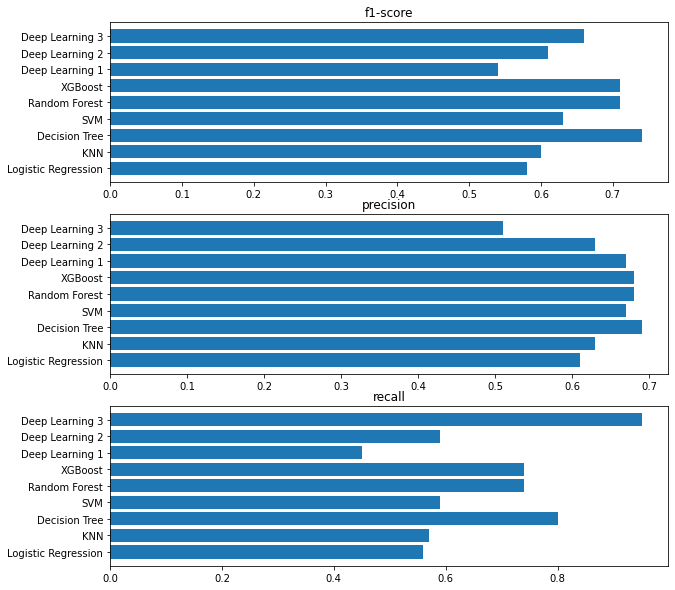

In [69]:
# f1-score와 precision으로 성능을 비교 했기때문에 bar chart로 보여주면 시각화를 통해 보다 편하게 성능 비교가 가능할 것으로 보입니다.
f1_score = {}
precision = {}
recall = {}
for m_name, m_score in result.items() :
    f1_score[m_name] = float(m_score.split('\n\n')[1].split('\n')[1].split()[3])
    precision[m_name] =  float(m_score.split('\n\n')[1].split('\n')[1].split()[1])
    recall[m_name] = float(m_score.split('\n\n')[1].split('\n')[1].split()[2])
    
    
plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
plt.title('f1-score')
plt.barh(y=list(f1_score.keys()), width=f1_score.values())

plt.subplot(3, 1, 2)
plt.title('precision')
plt.barh(y=list(precision.keys()), width=precision.values())

plt.subplot(3, 1, 3)
plt.title('recall')
plt.barh(y=list(recall.keys()), width=recall.values())

plt.show()

* 여러분의 선정한 모델로 비즈니스 문제를 해결할 수 있을까요? 여러분의 의견을 적어 봅시다.

In [70]:
# 이탈 고객을 미리 파악하고 고객의 특징을 파악해 추가 해택을 줄 수 있을 것으로 예상됩니다.
# 이탈 고객에게 추가 혜택을 줌으로 이탈 고객을 방지할 수 있을 것입니다.

* 비즈니스 문제 해결을 위해서 더 해볼 수 있는 것은 무엇인가요?

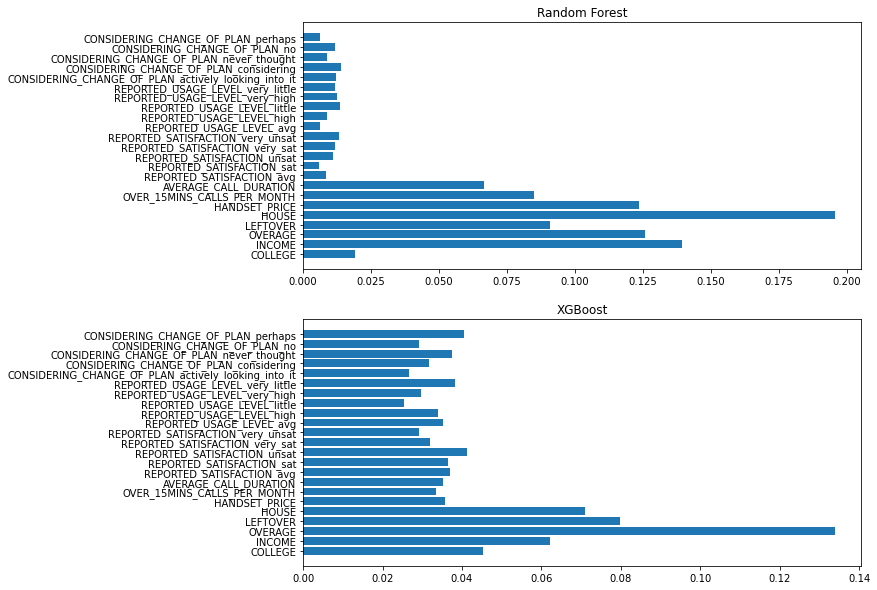

In [71]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.title('Random Forest')
plt.barh(y=list(x_train), width=model_rf.feature_importances_)

plt.subplot(2, 1, 2)
plt.title('XGBoost')
plt.barh(y=list(x_train), width=model_xgb.feature_importances_)

plt.show()

In [72]:
# 위의 중요 변수를 확인해 봤을 때 HAND PRICE와 OVERAGE, LEFTOVER가 이탈 고객에 큰 영향을 끼치는 것으로 보입니다.
# 즉, 비싼 가격의 폰을 사도 이탈을 하는 경우를 봐서는 VIP 고객에 대한 혜택이 부족한 것으로 보입니다.
# 남은 통화량 초과 통화량에 따른 이탈율이 높기 때문에 다양한 요금제로 고객이 요금 선택폭을 넓히는 것이 좋아보입니다.